In [6]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

In [52]:
load_dir = "../results/latent-trees/LWP-COT/"

bins = np.load(load_dir + "bins.npz")
properties = list(bins.keys())

distr_joint, distr_c, distr_s = {}, {}, {}

for key in ["train", "val", "test"]:
    distr_joint[key] = np.load(load_dir + "P(s,c)-{}.npz".format(key))
    distr_c[key] = np.load(load_dir + "P(c)-{}.npz".format(key))    
    distr_s[key] = np.load(load_dir + "P(s)-{}.npz".format(key)) 

In [53]:
nb_classes = len(distr_s["train"][properties[0]])
print("Loaded distributions for properties: ", properties)
print("Predicted", nb_classes, "classes")

Loaded distributions for properties:  ['cloud_water_path', 'cloud_optical_thickness']
Predicted 4 classes


/home/vale/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/vale/.local/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/home/vale/.local/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


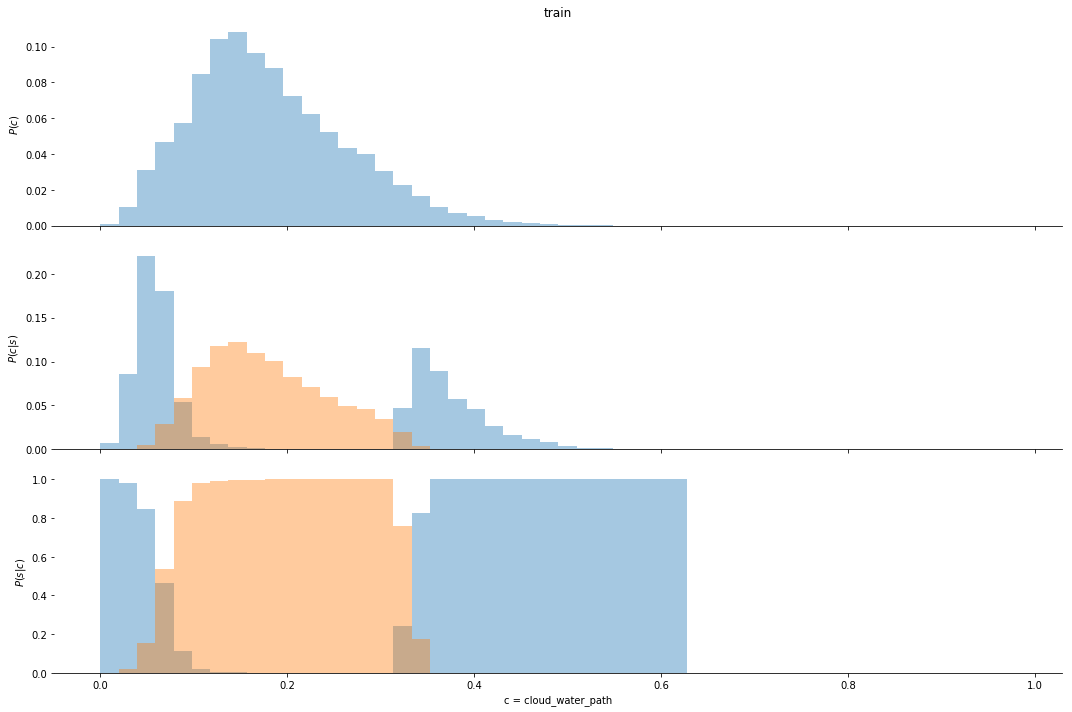

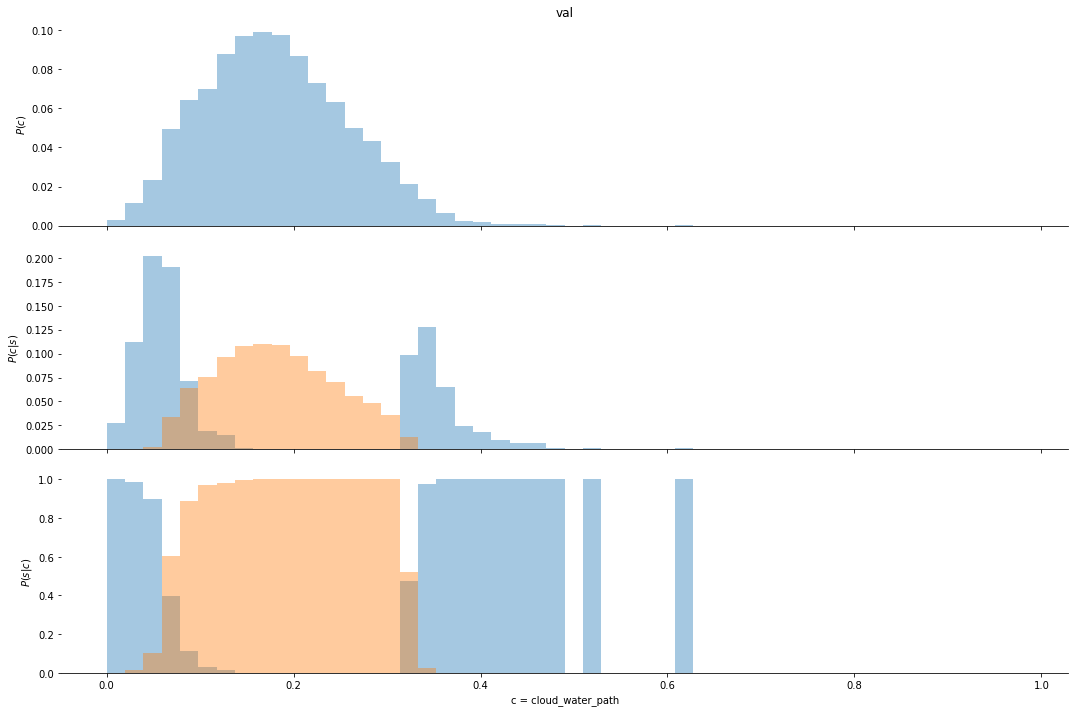

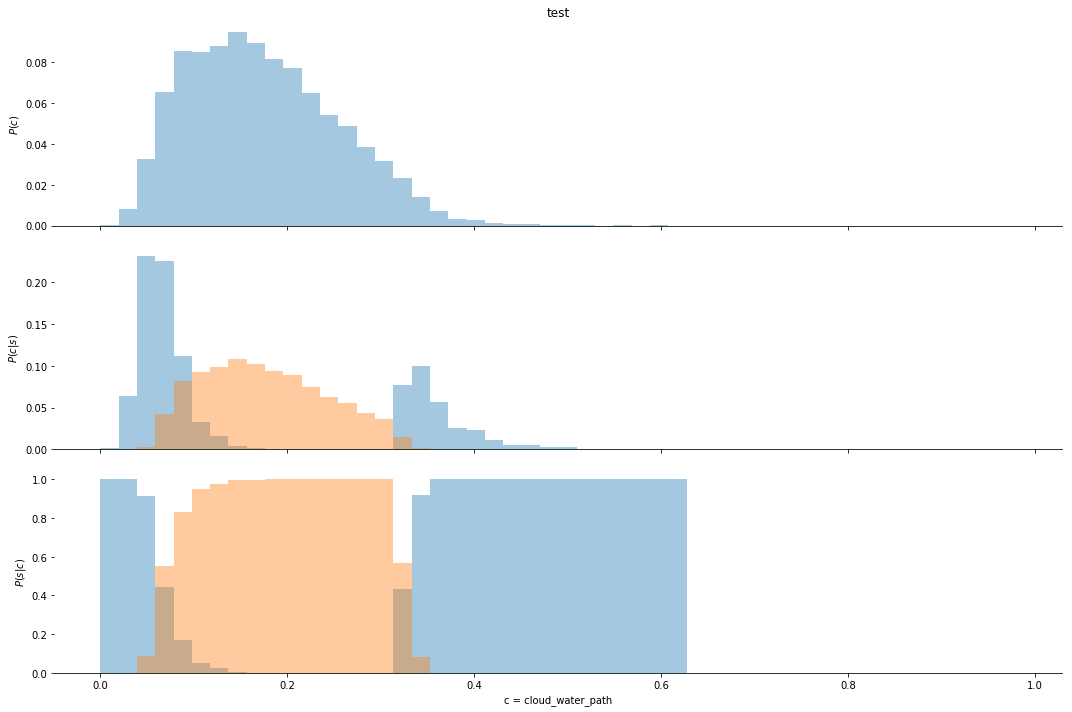

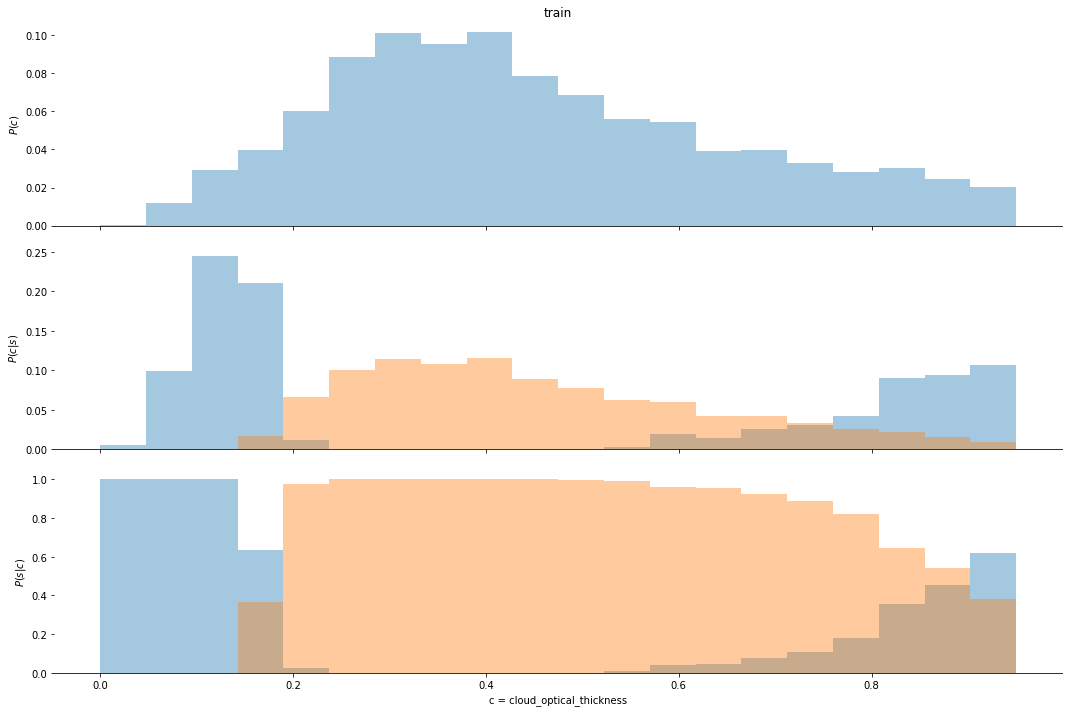

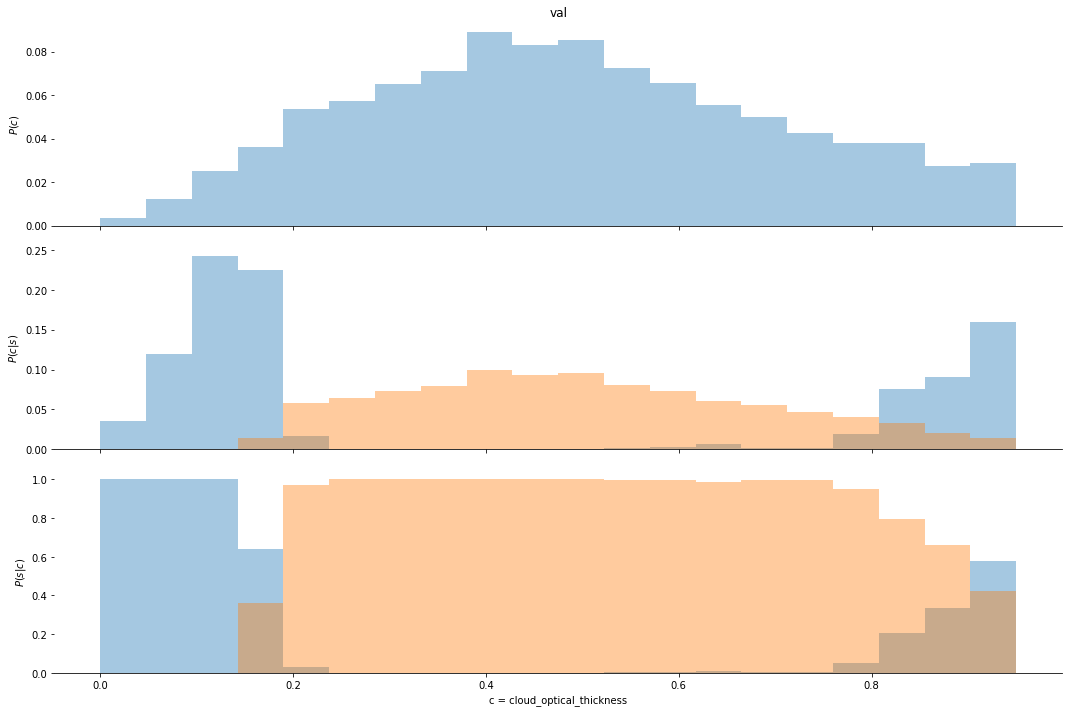

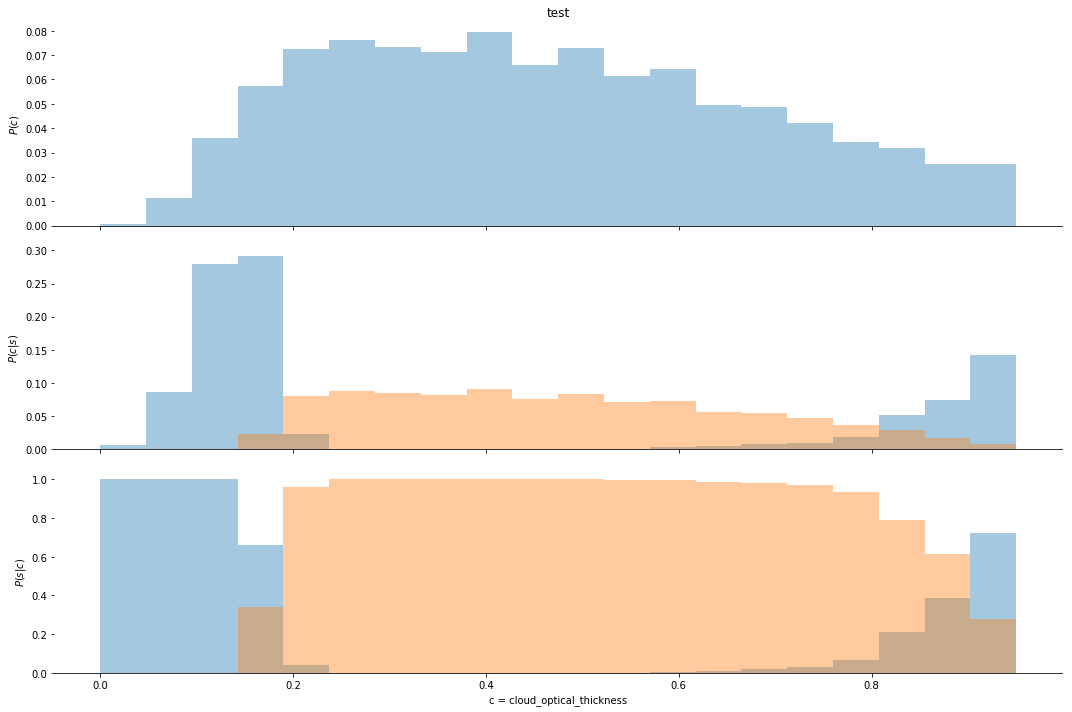

In [54]:
for prop in properties:
    b = bins[prop][:-1]
    B = len(b)   
    for key in ["train", "val", "test"]:
        f, axes = plt.subplots(3, 1, figsize=(15, 10), sharex=True)
        sns.despine(left=True)
        
        sns.distplot(b, hist_kws={"weights": distr_c[key][prop]}, kde=False, bins=B, ax=axes[0])
        axes[0].set(ylabel="$P(c)$")

        c_given_s = distr_joint[key][prop]/distr_s[key][prop][:, None]
        sns.distplot(b, hist_kws={"weights": c_given_s[0]}, kde=False, bins=B, ax=axes[1])
        sns.distplot(b, hist_kws={"weights": c_given_s[2]}, kde=False, bins=B, ax=axes[1])
        axes[1].set(ylabel="$P(c | s)$")

        sns.distplot(b, hist_kws={"weights": distr_joint[key][prop][0]/distr_c[key][prop]}, kde=False, bins=B, ax=axes[2])
        sns.distplot(b, hist_kws={"weights": distr_joint[key][prop][2]/distr_c[key][prop]}, kde=False, bins=B, ax=axes[2])
        axes[2].set(ylabel="$P(s | c)$")

        axes[0].set_title(key)
        axes[-1].set(xlabel="c = {}".format(prop))
        plt.tight_layout()

        plt.savefig(load_dir+"{}-{}.png".format(prop, key), bbox_inches="tight")